In [1]:
# Data manipulation/analysis
import numpy as np
import pandas as pd

# Text preprocessing/analysis
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context='talk')

In [2]:
# read data
df = pd.read_csv("newdataclean.csv", index_col='time',parse_dates=True)

newdf = df[df['newReview'].notna()]
newdf.head(10)

,Unnamed: 0,title,rating,review,user,newReview
time,,,,,,
2020-12-17 23:03:00,0,VOIR Drawstring Bag VN201460-C082003,1.0,Not satisfy.\nBecause the bag seems like show ...,s*****3VOIR Drawstring Bag VN201460-C082003\nV...,not satisfy bag seems like show bag scalp ady ...
2020-10-15 21:01:00,1,VOIR Crossbody Bag VN201435-C032001,1.0,Request return refund still send the product a...,d*****mVOIR Crossbody Bag VN201435-C032001\nVa...,request return refund still send product selle...
2020-10-14 00:26:00,2,VOIR Mid-Sized Sling Bag with Zip Closure VN20...,1.0,1. 这款沒打圈Voir beg在这里买的，完全没有标签拉链很普通也没标签，外面款式跟正品做...,c*****nVOIR Mid-Sized Sling Bag with Zip Closu...,voir beg voir beg
2020-10-08 17:31:00,3,[SHOPEE EXCLUSIVE] VOIR Quilted Sling Bag with...,1.0,Dissatisfied..please exchange this bag. Have d...,maisyarina,dissatisfied please exchange bag defect bag bi...
2020-10-01 17:00:00,4,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Beg koyak bahagian tepi bawah.. Dlm jahitan x ...,syirashopping,beg koyak bahagian tepi bawah dlm jahitan kema...
2020-09-12 22:54:00,5,SODA Women's Basic Puff Sleeve Dress SYC00842-...,1.0,Product description says Cotton but it’s actua...,j*****3SODA Women's Basic Puff Sleeve Dress SY...,product description says cotton actually polye...
2020-09-11 19:08:00,6,VOIR Mini Top Handle Bag VN201431-C031912,1.0,Bag looks more like a REJECTED batch because t...,r*****sVOIR Mini Top Handle Bag VN201431-C0319...,bag looks like rejected batch color dull faded...
2020-09-07 13:36:00,7,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Pearl not in good conditionVery poor product q...,a*****7VOIR Quilted Crossbody Bag VN201428-C03...,pearl not good conditionvery poor product quality
2020-09-07 01:57:00,8,ONLINE EXCLUSIVE - VOIR Small Tote with Double...,1.0,Delivery time below expectation,umiecongek,delivery time below expectation


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\AINA
[nltk_data]     ZULIANA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
sid = SentimentIntensityAnalyzer()
newdf[['neg', 'neu', 'pos', 'polarity']] =
newdf['newReview'].apply(sid.polarity_scores).apply(pd.Series)
newdf.head(50)

C:\Users\AINA ZULIANA\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,title,rating,review,user,newReview,neg,neu,pos,polarity
time,,,,,,,,,,
2020-12-17 23:03:00,0,VOIR Drawstring Bag VN201460-C082003,1.0,Not satisfy.\nBecause the bag seems like show ...,s*****3VOIR Drawstring Bag VN201460-C082003\nV...,not satisfy bag seems like show bag scalp ady ...,0.301,0.559,0.140,-0.4367
2020-10-15 21:01:00,1,VOIR Crossbody Bag VN201435-C032001,1.0,Request return refund still send the product a...,d*****mVOIR Crossbody Bag VN201435-C032001\nVa...,request return refund still send product selle...,0.309,0.609,0.082,-0.7059
2020-10-14 00:26:00,2,VOIR Mid-Sized Sling Bag with Zip Closure VN20...,1.0,1. 这款沒打圈Voir beg在这里买的，完全没有标签拉链很普通也没标签，外面款式跟正品做...,c*****nVOIR Mid-Sized Sling Bag with Zip Closu...,voir beg voir beg,0.000,1.000,0.000,0.0000
2020-10-08 17:31:00,3,[SHOPEE EXCLUSIVE] VOIR Quilted Sling Bag with...,1.0,Dissatisfied..please exchange this bag. Have d...,maisyarina,dissatisfied please exchange bag defect bag bi...,0.407,0.407,0.187,-0.4019
2020-10-01 17:00:00,4,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Beg koyak bahagian tepi bawah.. Dlm jahitan x ...,syirashopping,beg koyak bahagian tepi bawah dlm jahitan kema...,0.091,0.844,0.066,-0.0516
2020-09-12 22:54:00,5,SODA Women's Basic Puff Sleeve Dress SYC00842-...,1.0,Product description says Cotton but it’s actua...,j*****3SODA Women's Basic Puff Sleeve Dress SY...,product description says cotton actually polye...,0.000,1.000,0.000,0.0000
2020-09-11 19:08:00,6,VOIR Mini Top Handle Bag VN201431-C031912,1.0,Bag looks more like a REJECTED batch because t...,r*****sVOIR Mini Top Handle Bag VN201431-C0319...,bag looks like rejected batch color dull faded...,0.566,0.320,0.114,-0.8720
2020-09-07 13:36:00,7,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Pearl not in good conditionVery poor product q...,a*****7VOIR Quilted Crossbody Bag VN201428-C03...,pearl not good conditionvery poor product quality,0.242,0.502,0.256,0.0382
2020-09-07 01:57:00,8,ONLINE EXCLUSIVE - VOIR Small Tote with Double...,1.0,Delivery time below expectation,umiecongek,delivery time below expectation,0.000,1.000,0.000,0.0000


In [5]:
def sentiment(row):
   if row['polarity'] == 0:
      return 'Neutral'
   if row['polarity'] > 0:
      return 'Positive'
   if row['polarity'] < 0:
      return 'Negative'

newdf['sentiment'] = newdf.apply(lambda row: sentiment(row), axis=1)
newdf.head(10)

<ipython-input-5-812225c5987d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['sentiment'] = newdf.apply(lambda row: sentiment(row), axis=1)


,Unnamed: 0,title,rating,review,user,newReview,neg,neu,pos,polarity,sentiment
time,,,,,,,,,,,
2020-12-17 23:03:00,0,VOIR Drawstring Bag VN201460-C082003,1.0,Not satisfy.\nBecause the bag seems like show ...,s*****3VOIR Drawstring Bag VN201460-C082003\nV...,not satisfy bag seems like show bag scalp ady ...,0.301,0.559,0.140,-0.4367,Negative
2020-10-15 21:01:00,1,VOIR Crossbody Bag VN201435-C032001,1.0,Request return refund still send the product a...,d*****mVOIR Crossbody Bag VN201435-C032001\nVa...,request return refund still send product selle...,0.309,0.609,0.082,-0.7059,Negative
2020-10-14 00:26:00,2,VOIR Mid-Sized Sling Bag with Zip Closure VN20...,1.0,1. 这款沒打圈Voir beg在这里买的，完全没有标签拉链很普通也没标签，外面款式跟正品做...,c*****nVOIR Mid-Sized Sling Bag with Zip Closu...,voir beg voir beg,0.000,1.000,0.000,0.0000,Neutral
2020-10-08 17:31:00,3,[SHOPEE EXCLUSIVE] VOIR Quilted Sling Bag with...,1.0,Dissatisfied..please exchange this bag. Have d...,maisyarina,dissatisfied please exchange bag defect bag bi...,0.407,0.407,0.187,-0.4019,Negative
2020-10-01 17:00:00,4,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Beg koyak bahagian tepi bawah.. Dlm jahitan x ...,syirashopping,beg koyak bahagian tepi bawah dlm jahitan kema...,0.091,0.844,0.066,-0.0516,Negative
2020-09-12 22:54:00,5,SODA Women's Basic Puff Sleeve Dress SYC00842-...,1.0,Product description says Cotton but it’s actua...,j*****3SODA Women's Basic Puff Sleeve Dress SY...,product description says cotton actually polye...,0.000,1.000,0.000,0.0000,Neutral
2020-09-11 19:08:00,6,VOIR Mini Top Handle Bag VN201431-C031912,1.0,Bag looks more like a REJECTED batch because t...,r*****sVOIR Mini Top Handle Bag VN201431-C0319...,bag looks like rejected batch color dull faded...,0.566,0.320,0.114,-0.8720,Negative
2020-09-07 13:36:00,7,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Pearl not in good conditionVery poor product q...,a*****7VOIR Quilted Crossbody Bag VN201428-C03...,pearl not good conditionvery poor product quality,0.242,0.502,0.256,0.0382,Positive
2020-09-07 01:57:00,8,ONLINE EXCLUSIVE - VOIR Small Tote with Double...,1.0,Delivery time below expectation,umiecongek,delivery time below expectation,0.000,1.000,0.000,0.0000,Neutral


In [6]:
newdf['Week']=newdf.index.week
newdf['Month']=newdf.index.month
newdf['Year']=newdf.index.year

newdf.head()

<ipython-input-6-b2f0b5162627>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Week']=newdf.index.week
<ipython-input-6-b2f0b5162627>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Month']=newdf.index.month
<ipython-input-6-b2f0b5162627>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,Unnamed: 0,title,rating,review,user,newReview,neg,neu,pos,polarity,sentiment,Week,Month,Year
time,,,,,,,,,,,,,,
2020-12-17 23:03:00,0,VOIR Drawstring Bag VN201460-C082003,1.0,Not satisfy.\nBecause the bag seems like show ...,s*****3VOIR Drawstring Bag VN201460-C082003\nV...,not satisfy bag seems like show bag scalp ady ...,0.301,0.559,0.140,-0.4367,Negative,51,12,2020
2020-10-15 21:01:00,1,VOIR Crossbody Bag VN201435-C032001,1.0,Request return refund still send the product a...,d*****mVOIR Crossbody Bag VN201435-C032001\nVa...,request return refund still send product selle...,0.309,0.609,0.082,-0.7059,Negative,42,10,2020
2020-10-14 00:26:00,2,VOIR Mid-Sized Sling Bag with Zip Closure VN20...,1.0,1. 这款沒打圈Voir beg在这里买的，完全没有标签拉链很普通也没标签，外面款式跟正品做...,c*****nVOIR Mid-Sized Sling Bag with Zip Closu...,voir beg voir beg,0.000,1.000,0.000,0.0000,Neutral,42,10,2020
2020-10-08 17:31:00,3,[SHOPEE EXCLUSIVE] VOIR Quilted Sling Bag with...,1.0,Dissatisfied..please exchange this bag. Have d...,maisyarina,dissatisfied please exchange bag defect bag bi...,0.407,0.407,0.187,-0.4019,Negative,41,10,2020
2020-10-01 17:00:00,4,VOIR Quilted Crossbody Bag VN201428-C031912,1.0,Beg koyak bahagian tepi bawah.. Dlm jahitan x ...,syirashopping,beg koyak bahagian tepi bawah dlm jahitan kema...,0.091,0.844,0.066,-0.0516,Negative,40,10,2020


In [7]:
# Encode to numeric
newdf['target'] = np.where(newdf['sentiment']=='positive', 1, 0)

#Check values
newdf.groupby(['sentiment', 'target']).count().unstack()

<ipython-input-7-2ab8e0a0b55e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['target'] = np.where(newdf['sentiment']=='positive', 1, 0)


,Unnamed: 0,title,rating,review,user,newReview,neg,neu,pos,polarity,Week,Month,Year
target,0,0,0,0,0,0,0,0,0,0,0,0,0
sentiment,,,,,,,,,,,,,
Negative,193,193,187,193,149,193,193,193,193,193,193,193,193
Neutral,906,906,832,906,548,906,906,906,906,906,906,906,906
Positive,4172,4172,3733,4172,1997,4172,4172,4172,4172,4172,4172,4172,4172


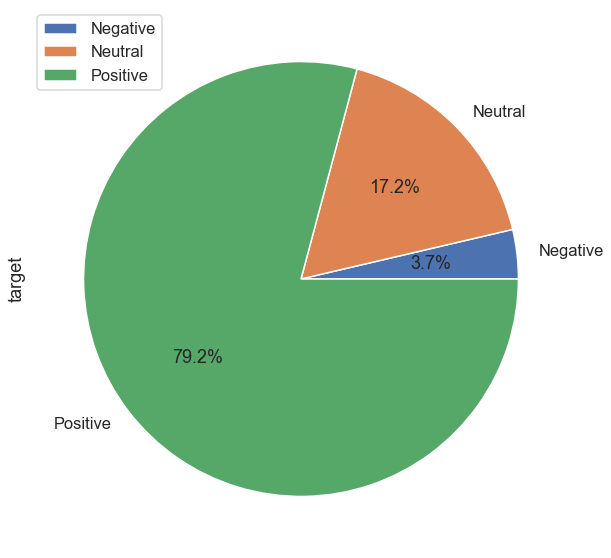

In [8]:
#Pie Chart

newdf.groupby(['sentiment']).count().plot(kind='pie', y='target', figsize=(15,10), autopct='%1.1f%%')

In [9]:
newdf.to_csv("ndc.csv")